<a href="https://colab.research.google.com/github/swagat-7/customerclassification/blob/main/customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
n_customers=500
ages=np.random.randint(18,70,n_customers)
genders=np.random.randint(0,2,n_customers)
income=np.random.normal(50,15,n_customers)
purchase_freq=np.random.poisson(3,n_customers)
churn=((income<40)&(purchase_freq<3)).astype(int)
df_customers=pd.DataFrame({
    'Age':ages,
    'Gender':genders,
    'Income':income,
    'Purchase Frequency':purchase_freq,
    'Churn':churn



})
df_customers.to_csv("customers.csv",index=False)
print("customer data created and saved to 'customers.csv'")
print(df_customers.head())



customer data created and saved to 'customers.csv'
   Age  Gender     Income  Purchase Frequency  Churn
0   56       1  24.449263                   2      1
1   69       0  49.166785                   2      0
2   46       0  55.760982                   4      0
3   32       1  49.509579                   4      0
4   60       0  18.988368                   1      1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df=pd.read_csv("customers.csv")
df.head()

,Age,Gender,Income,Purchase Frequency,Churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1


In [ ]:
#Data info and check for nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Gender              500 non-null    int64  
 2   Income              500 non-null    float64
 3   Purchase Frequency  500 non-null    int64  
 4   Churn               500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
Purchase Frequency,0
Churn,0


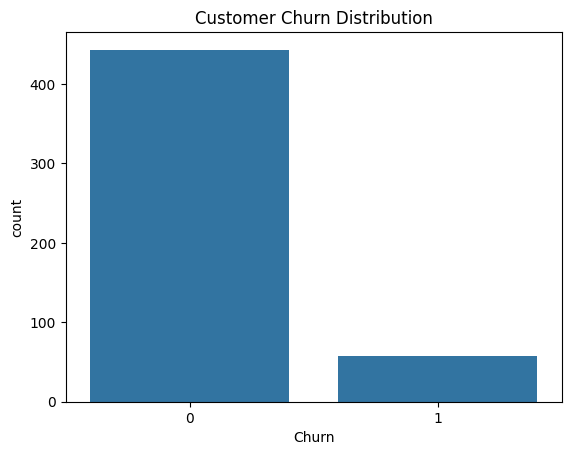

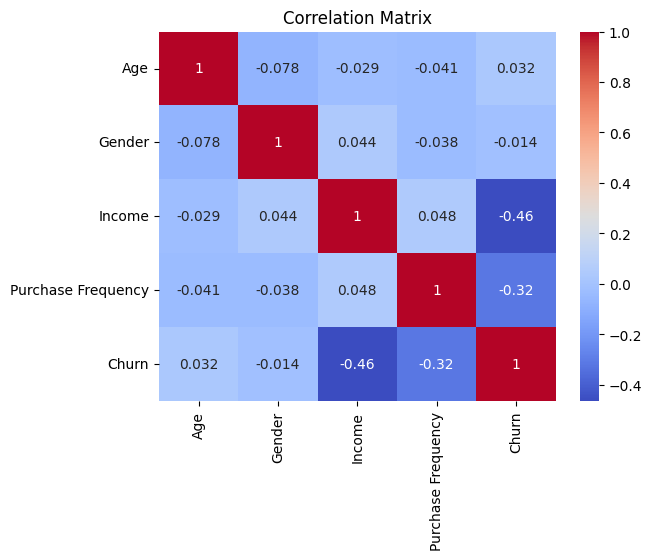

In [ ]:
# Churn distribution
sns.countplot (data=df, x='Churn' )
plt.title ( "Customer Churn Distribution")
plt.show()
# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title ("Correlation Matrix")
plt.show()

Accuracy score: 0.91
confusion matrix:
 [[85  2]
 [ 7  6]]
classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



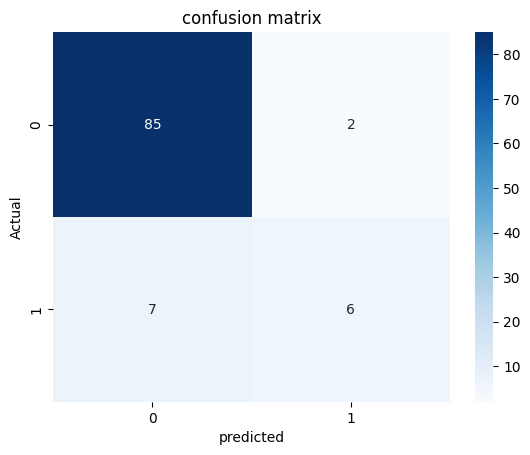

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)

print("confusion matrix:\n",cm)
print("classification report:\n",classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
new_customer=pd.DataFrame({
    'Age':[28],
    'Gender':[1],
    'Income':[37],
    'Purchase Frequency':[2]
})
prediction=model.predict(new_customer)[0]
if prediction ==1:
    print("The customer is likely to CHURN.consider offering retention benefits")
else:
    print("The customer is likely to STAY.continue engagement as usual.")


The customer is likely to STAY.continue engagement as usual.


goal:predict if a student will pass(1) or fail(0) based on hours studied


In [ ]:

age = 45             # x1
balance = 25000      # x2
transactions = 6     # x3

# Example coefficients learned by the model (for explanation)
b0 = -4              # Intercept
b1 = 0.05            # Coefficient for age
b2 = 0.0001          # Coefficient for balance
b3 = 0.3             # Coefficient for transactions

# Step 1: Calculate linear score (z)
z = b0 + (b1 * age) + (b2 * balance) + (b3 * transactions)
print("Linear score (z):", round(z, 4))

# Step 2: Apply sigmoid function to convert z to probability
probability = 1 / (1 + np.exp(-z))
print("Predicted probability of churn:", round(probability, 4))

# Step 3: Predict churn based on threshold 0.5
if probability > 0.5:
    print(" This customer is likely to CHURN.")
else:
    print(" This customer is likely to STAY.")


Linear score (z): 2.55
Predicted probability of churn: 0.9276
 This customer is likely to CHURN.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

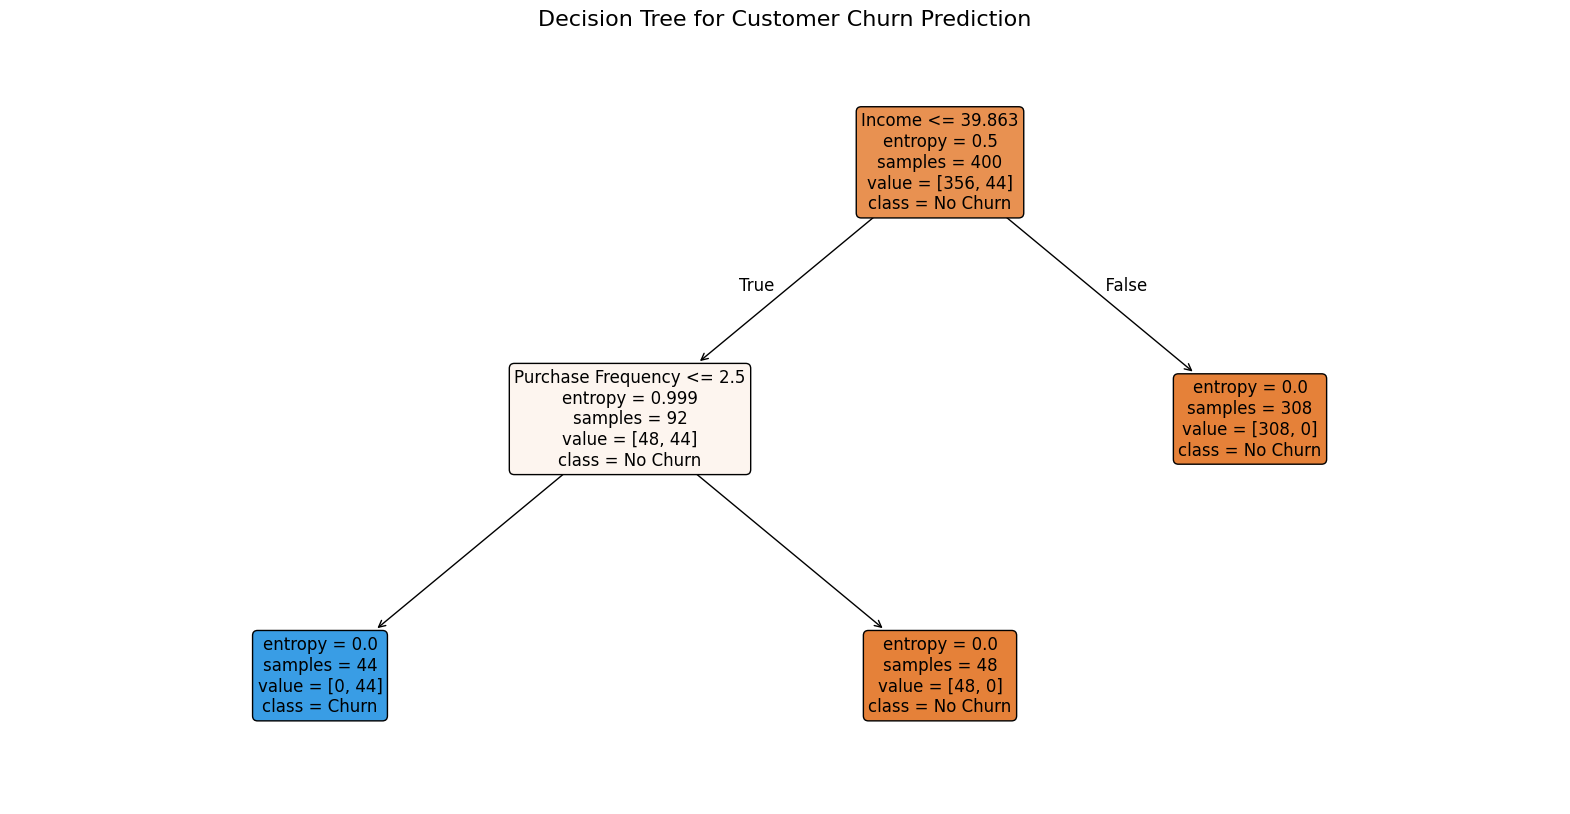

In [ ]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42,criterion="entropy")
clf.fit(x_train, y_train) # Changed X_train to x_train

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=x.columns,  # Changed X to x to match the variable used for features
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Customer Churn Prediction", fontsize=16)
plt.show()

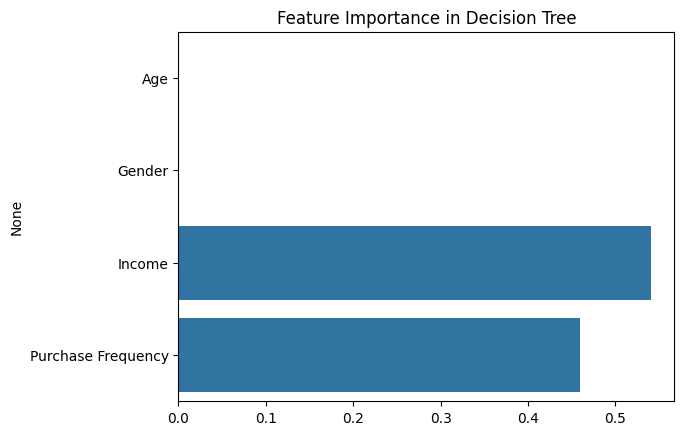

In [ ]:
feature_importance = pd.Series(clf.feature_importances_, index=x.columns) # Changed X to x
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance in Decision Tree")
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        13

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
 [[87  0]
 [ 0 13]]


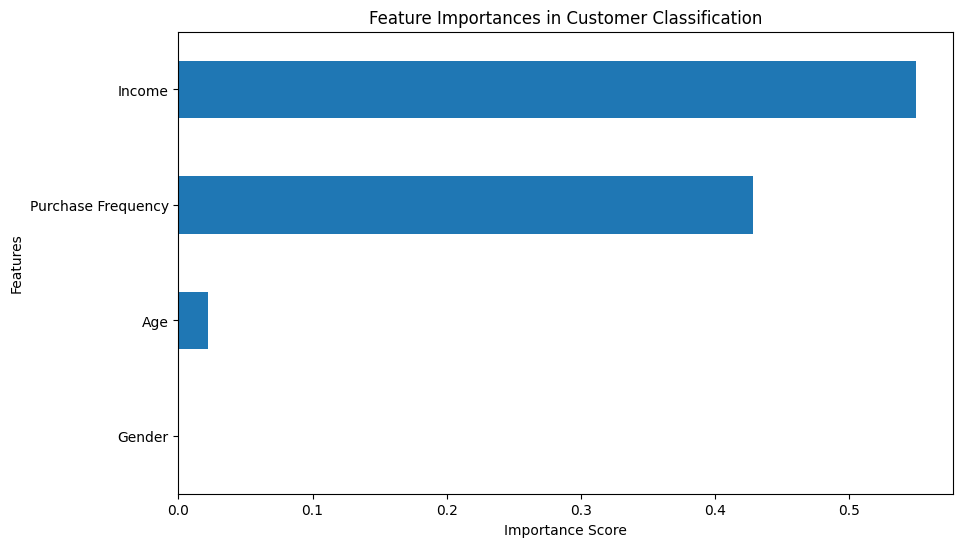

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=4, random_state=42)
model.fit(x_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(x_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot feature importances
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances in Customer Classification")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
